In [1]:
# Importación de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
OMP_NUM_THREADS=1

In [2]:
# Preprocesamiento de datos para el analisis exploratorio de datos
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA


In [39]:
# 1. Cargar el dataset
df = pd.read_csv('Mall_Customers.csv',sep=";")


In [21]:
# 2.  analisis exploratorio de datos
# Información básica del dataset
print("Información del dataset:")
print(df.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB
None


In [22]:
# Resumen de estadisticas
print("\nResumen estadistico:")
print(df.describe())


Resumen estadistico:
       CustomerID      Gender         Age  Annual Income (k$)  \
count  200.000000  200.000000  200.000000          200.000000   
mean   100.500000    0.440000   38.850000           60.560000   
std     57.879185    0.497633   13.969007           26.264721   
min      1.000000    0.000000   18.000000           15.000000   
25%     50.750000    0.000000   28.750000           41.500000   
50%    100.500000    0.000000   36.000000           61.500000   
75%    150.250000    1.000000   49.000000           78.000000   
max    200.000000    1.000000   70.000000          137.000000   

       Spending Score (1-100)  
count              200.000000  
mean                50.200000  
std                 25.823522  
min                  1.000000  
25%                 34.750000  
50%                 50.000000  
75%                 73.000000  
max                 99.000000  


In [23]:
# Check for missing values
print("\nValores faltantes:")
print(df.isnull().sum())


Valores faltantes:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


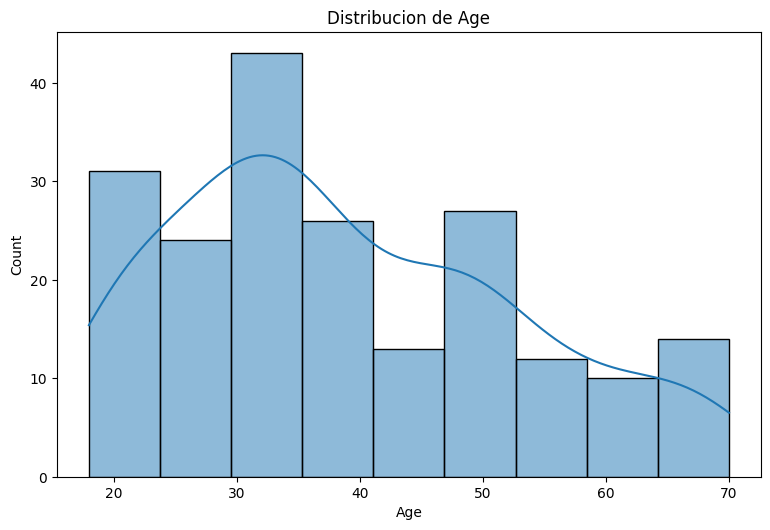

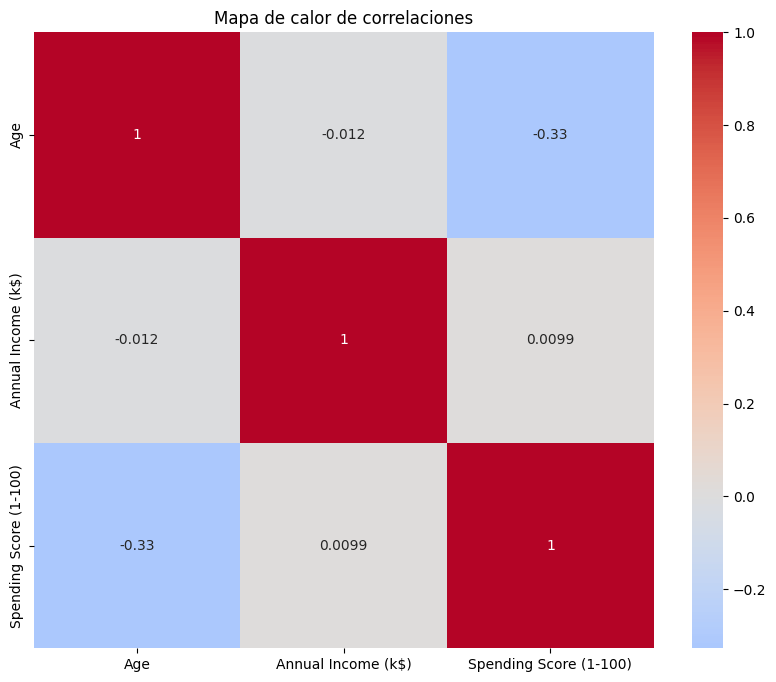

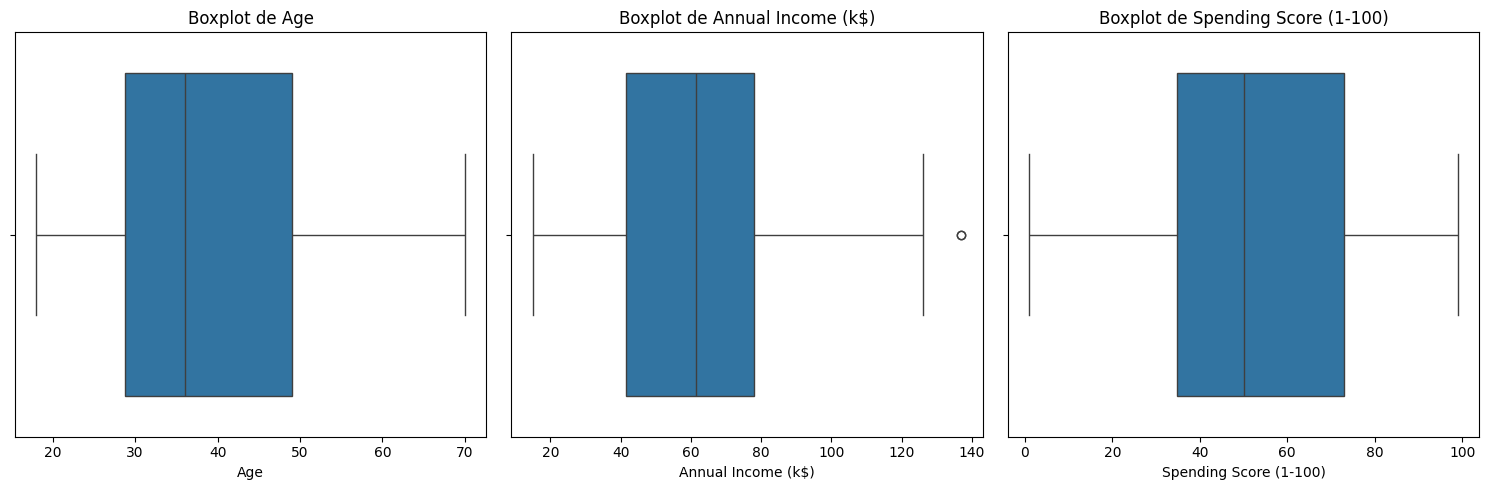

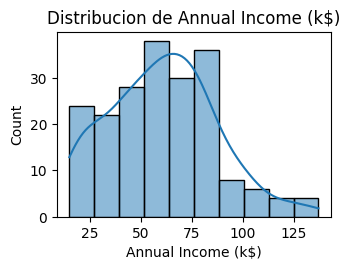

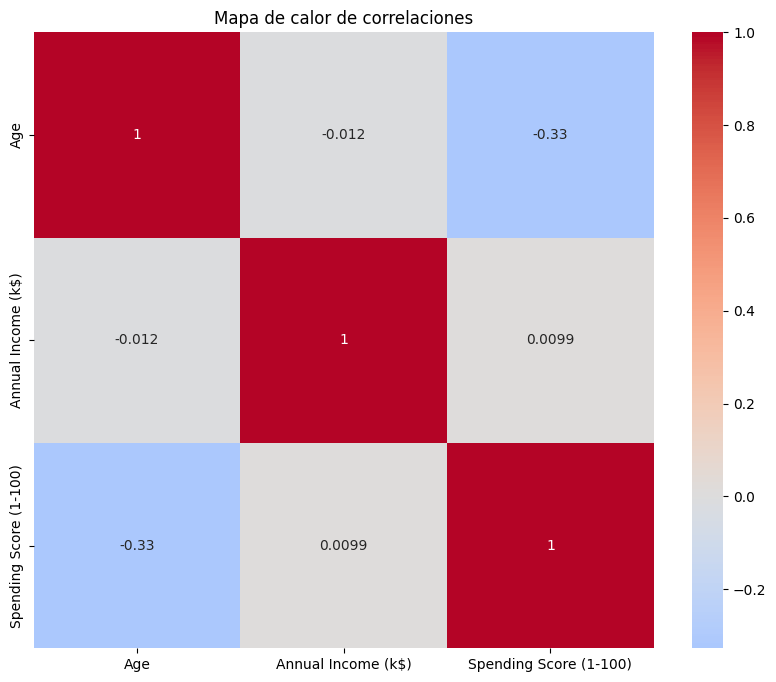

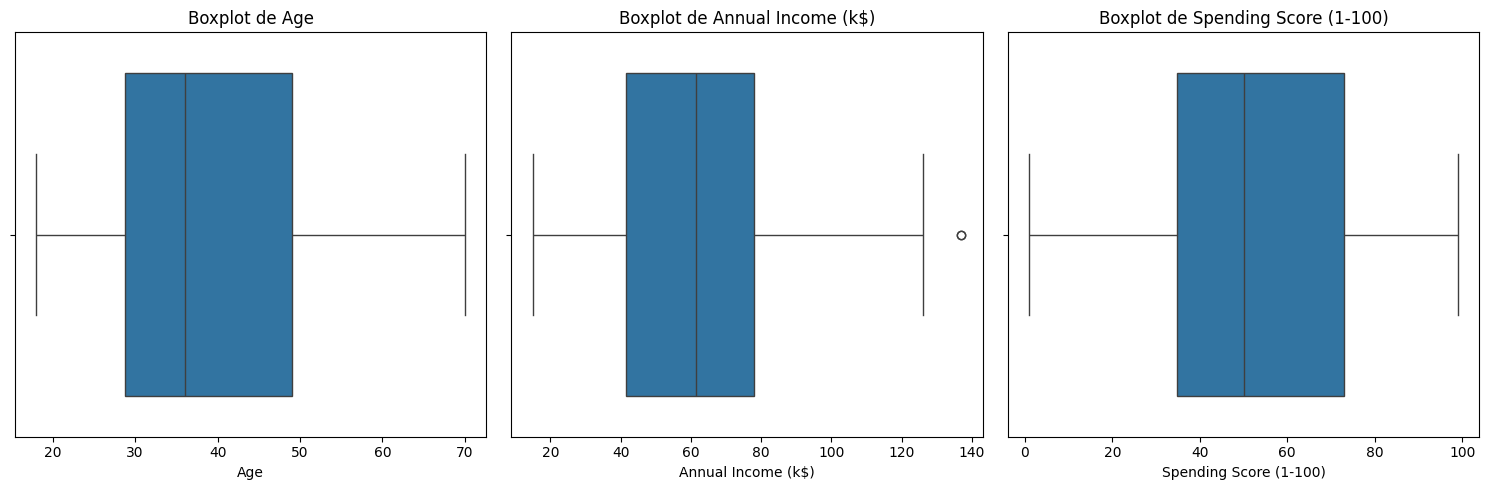

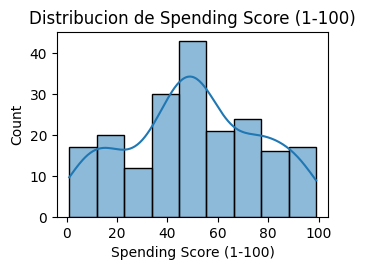

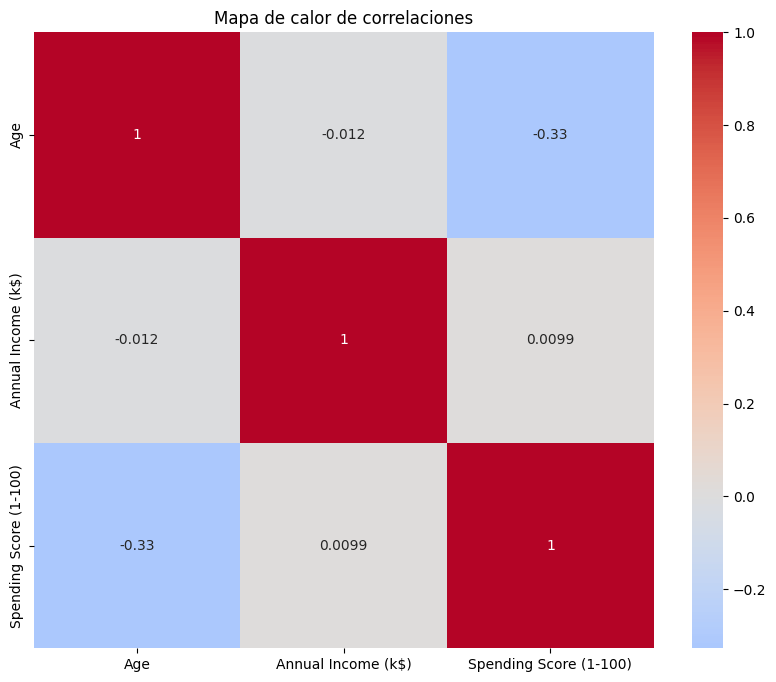

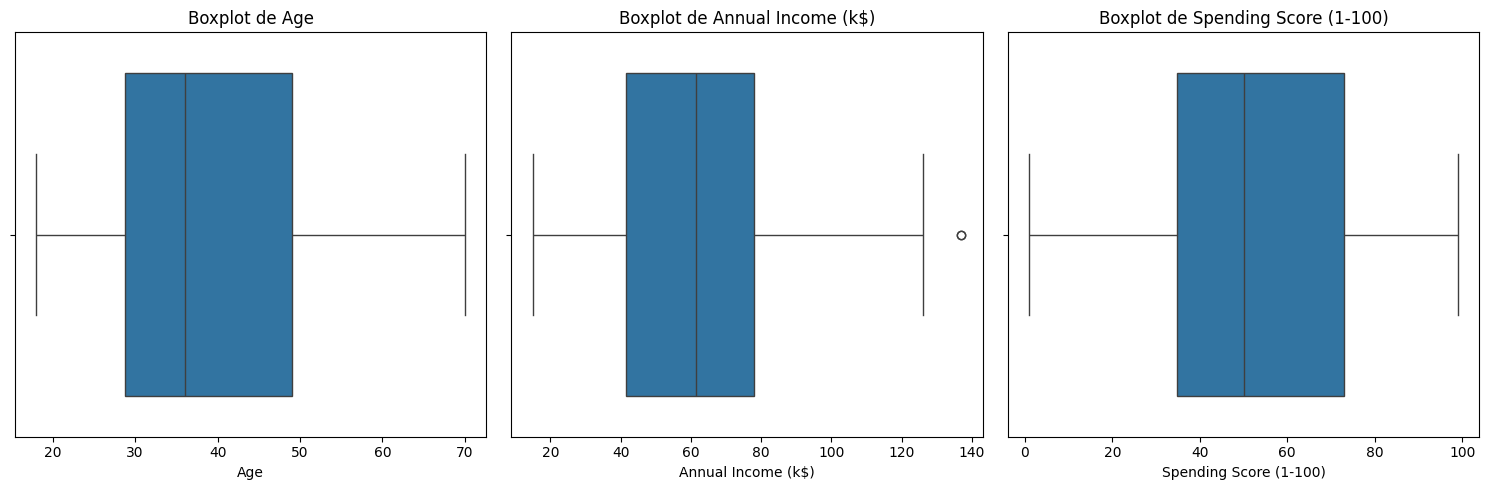

In [29]:
# Visualization of distributions
plt.figure(figsize=(15, 10))
# Histograma
numerical_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribucion de {col}')

    plt.tight_layout()
    plt.show()

     # Mapa de calor de correlaciones
    plt.figure(figsize=(10, 8))
    correlation_matrix = df[numerical_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Mapa de calor de correlaciones')
    plt.show()

        # Caja bigote
    plt.figure(figsize=(15, 5))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(1, 3, i)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot de {col}')
    plt.tight_layout()
    plt.show()

In [30]:
# 3. Preprocesamiento de datos
def preprocess_data(dataframe):
    # Select features for clustering
    features = ['Annual Income (k$)', 'Spending Score (1-100)']
    X = dataframe[features]

    # Standarizar las caracteristicas
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, features


In [33]:
# Preprocesar los datos
X_scaled, features = preprocess_data(df)

# 4. Método de elbow
def find_optimal_clusters(X_scaled):

    inertias = []
    silhouette_scores = []
    k_range = range(2, 11)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))


    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(k_range, inertias, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')

    plt.subplot(1, 2, 2)
    plt.plot(k_range, silhouette_scores, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score')

    plt.tight_layout()
    plt.show()

    return inertias, silhouette_scores


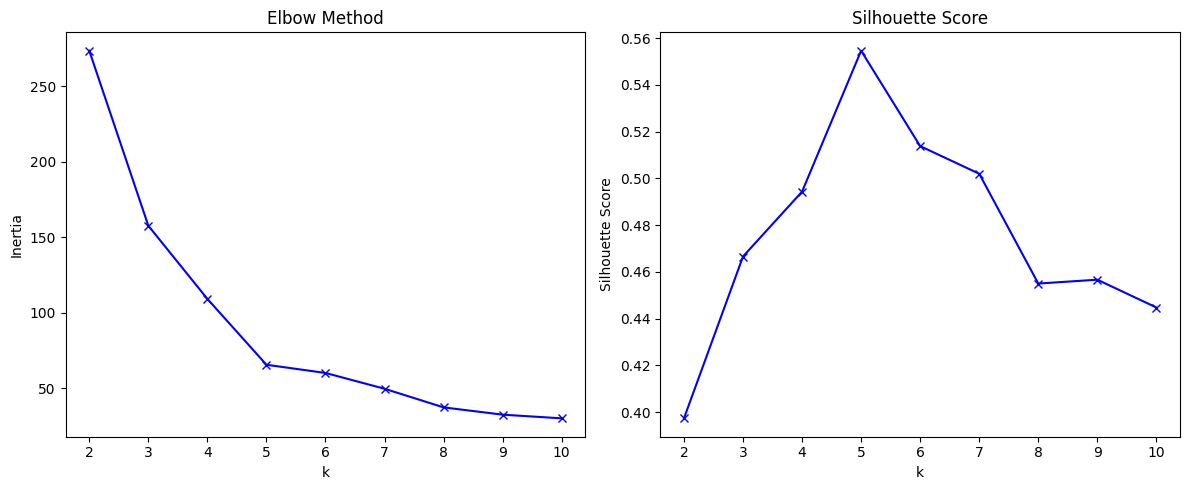

Clustering Metrics for 5 clusters:
Silhouette Score: 0.5547
Calinski-Harabasz Index: 248.6493


In [34]:
# Hallar el número óptimo de clusters
inertias, silhouette_scores = find_optimal_clusters(X_scaled)

# 5. Ejecutar k-clustering
def perform_clustering(X_scaled, n_clusters=5):
    # Perform K-Means Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)

    # Compute clustering metrics
    silhouette = silhouette_score(X_scaled, cluster_labels)
    calinski = calinski_harabasz_score(X_scaled, cluster_labels)

    print(f"Clustering Metrics for {n_clusters} clusters:")
    print(f"Silhouette Score: {silhouette:.4f}")
    print(f"Calinski-Harabasz Index: {calinski:.4f}")

    return kmeans, cluster_labels

kmeans, cluster_labels = perform_clustering(X_scaled)

In [36]:
def visualize_clusters(X_scaled, cluster_labels, features):
    # Create a DataFrame with scaled features and cluster labels
    cluster_df = pd.DataFrame(X_scaled, columns=features)
    cluster_df['Cluster'] = cluster_labels

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(cluster_df[features[0]],
                          cluster_df[features[1]],
                          c=cluster_df['Cluster'],
                          cmap='viridis')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title('Clusters of Mall Customers')
    plt.colorbar(scatter)
    plt.show()

    cluster_centers = kmeans.cluster_centers_
    print("\nCluster Centers:")
    center_df = pd.DataFrame(cluster_centers, columns=features)
    print(center_df)

    plt.figure(figsize=(10, 6))
    cluster_df['Cluster'].value_counts().plot(kind='bar')
    plt.title('Distribution of Customers in Each Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Number of Customers')
    plt.show()


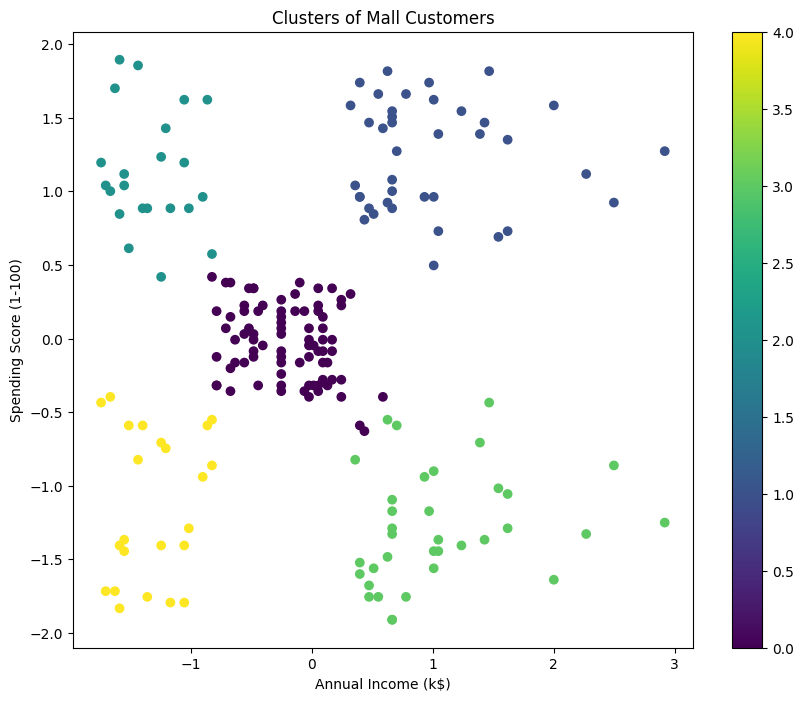


Cluster Centers:
   Annual Income (k$)  Spending Score (1-100)
0           -0.200913               -0.026456
1            0.991583                1.239503
2           -1.329545                1.132178
3            1.055003               -1.284439
4           -1.307519               -1.136965


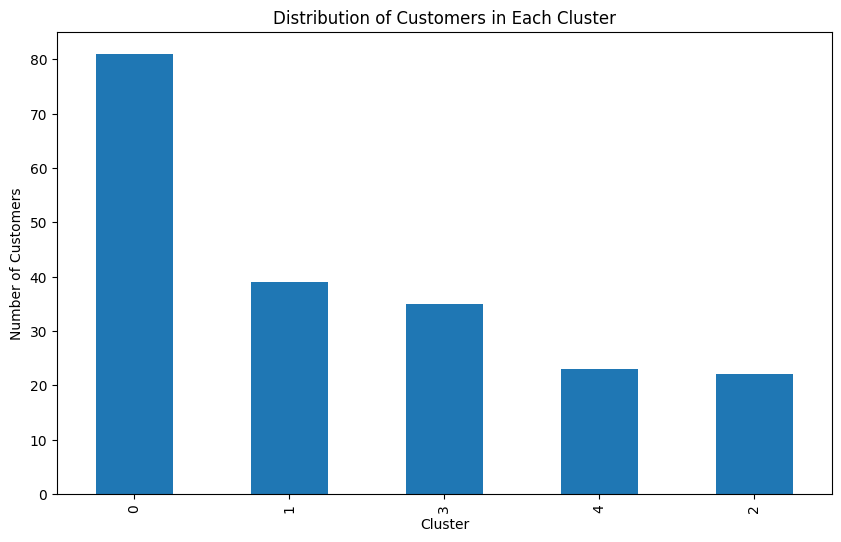

In [37]:
visualize_clusters(X_scaled, cluster_labels, features)


Cluster Characteristics:
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        42.716049           55.296296               49.518519
1        32.692308           86.538462               82.128205
2        25.272727           25.727273               79.363636
3        41.114286           88.200000               17.114286
4        45.217391           26.304348               20.913043


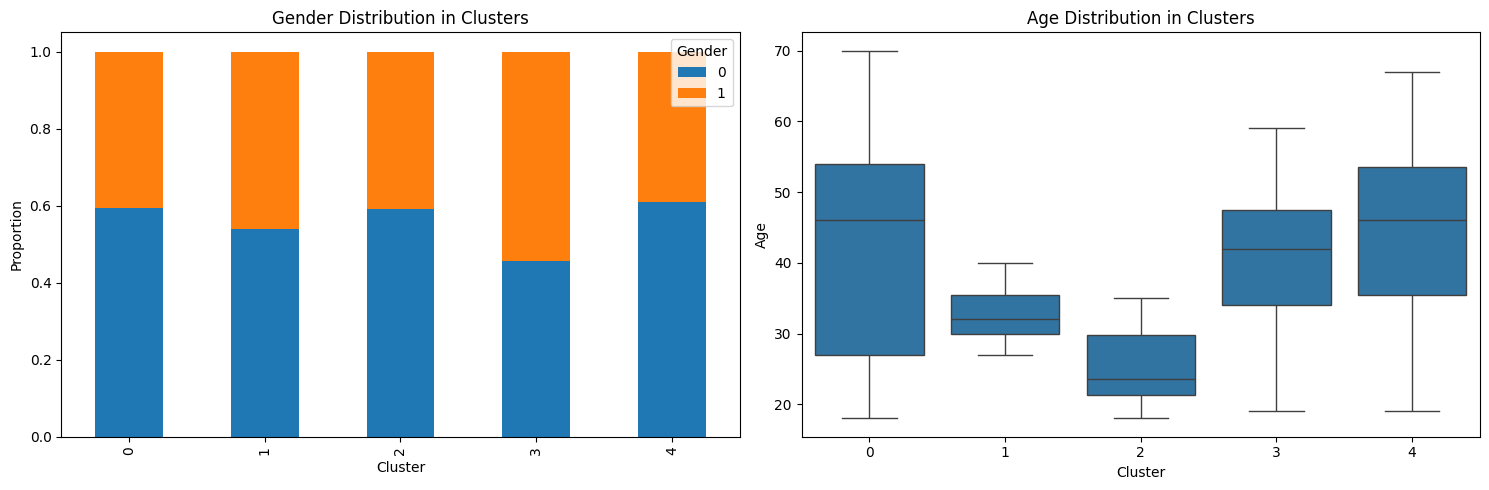

K-Means Clustering Analysis Complete!


In [38]:
def analyze_clusters(original_df, cluster_labels, features):
    clustered_df = original_df.copy()
    clustered_df['Cluster'] = cluster_labels

    cluster_analysis = clustered_df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
    print("\nCluster Characteristics:")
    print(cluster_analysis)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    cluster_gender = pd.crosstab(clustered_df['Cluster'], clustered_df['Gender'], normalize='index')
    cluster_gender.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title('Gender Distribution in Clusters')
    plt.xlabel('Cluster')
    plt.ylabel('Proportion')

    plt.subplot(1, 2, 2)
    sns.boxplot(x='Cluster', y='Age', data=clustered_df)
    plt.title('Age Distribution in Clusters')

    plt.tight_layout()
    plt.show()

analyze_clusters(df, cluster_labels, features)

print("K-Means Clustering Analysis Complete!")